In [916]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.utils import to_categorical

In [917]:
iris = datasets.load_iris()

In [918]:
X = iris.data[:,:3]
y = iris.target

In [919]:
print(X.shape, y.shape)

(150, 3) (150,)


In [920]:
y = to_categorical(y)

In [921]:
y.shape

(150, 3)

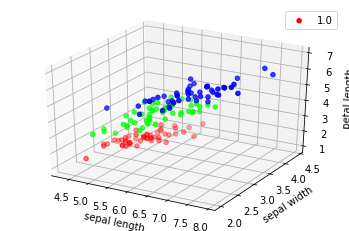

In [922]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:, 2], c=y, cmap=plt.cm.Set1)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
# ax.plot(y,)
plt.legend(y[0])
plt.legend(y[1])
plt.legend(y[2])
plt.show()

In [923]:
train_data, test_data, train_target, test_target = train_test_split(X, y, shuffle=True, test_size=0.3)

In [924]:
print(train_data.shape, test_data.shape)

(105, 3) (45, 3)


In [925]:
normalized_train = np.zeros(train_data.shape)
normalized_test = np.zeros(test_data.shape)
avg = np.zeros(train_data.shape[1])
std = np.zeros(train_data.shape[1])
for i in range(train_data.shape[1]):
#     avg = np.mean(train_data[:,i])
#     std = np.std(train_data[:,i])
#     normalized_train[:,i] = (train_data[:,i]-avg)/std
#     normalized_test[:,i] = (test_data[:,i]-avg)/std
    avg[i] = np.mean(train_data[:,i])
    std[i] = np.std(train_data[:,i])
normalized_train = (train_data-avg)/std
normalized_test = (test_data-avg)/std
    
print(normalized_train.shape, normalized_test.shape)

(105, 3) (45, 3)


In [926]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(normalized_train.shape[1],)))
model.add(layers.Dense(32))
model.add(layers.Dense(64))
model.add(layers.Dense(128))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(lr=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(normalized_train, train_target, epochs=100, batch_size=2, validation_split=0.1, shuffle=True, verbose=0)

In [927]:
# model.summary()

In [928]:
result = model.evaluate(normalized_test, test_target)
print("Test loss:", result[0], "Test accuracy:", str(result[1]*100)+'%')

45/45 [==============================] - 0s 244us/step
Test loss: 0.01660074173576302 Test accuracy: 100.0%


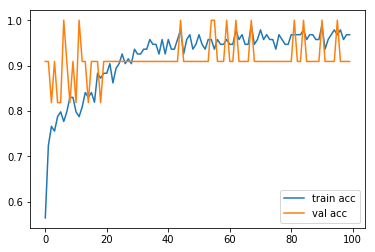

In [929]:
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()

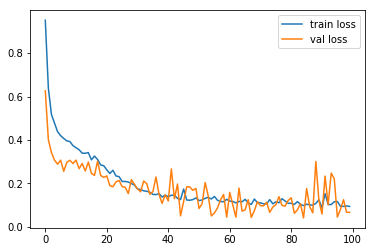

In [930]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()